# Getting Started with NLP : Hands-on-02

This notebook covers some of basic steps involved in using Deep Learning for NLP. This notebook covers:
+ A brief overview of Word2Vec based Embeddings.
+ A brief on HuggingFace Transformer :hugs: based implementation of NLP tasks


Note: This is just an overview and not an exhaustive material on NLP with Deep Learning


[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/raghavbali/nlp_starterpack_webinar/blob/main/notebooks/getting_started_with_nlp_handson_2.ipynb
)

## Text Representation using Deep Learning: Word2Vec

In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

pd.options.display.max_colwidth = 200

### Prepare Dataset

In [32]:
categories = ['alt.atheism', 'comp.graphics', 'sci.med']

In [40]:
twenty_corpus = fetch_20newsgroups(subset='train',
    categories=categories, shuffle=True, random_state=42)

In [49]:
[news.split('\n')[1] for news in twenty_corpus.data[:10]]

['Subject: FAQ: Typing Injuries (4/4): Software Monitoring Tools [monthly posting]',
 'Subject: Re: Breech Baby Info Needed',
 'Subject: WingCommanderII Graphics',
 'Subject: DREGISTERe: XV for MS-DOS',
 'Subject: Re: TIFF: philosophical significance of 42',
 'Subject: Re: <Political Atheists?',
 'Subject: Re: seizures ( infantile spasms )',
 'Subject: Re: chronic sinus and antibiotics',
 'Subject: Re: Death Penalty / Gulf War (long)',
 'Subject: Re: "Cruel" (was Re: <Political Atheists?)']

In [38]:
twenty_corpus.target[:10]

array([2, 2, 1, 1, 1, 0, 2, 2, 0, 0])

In [51]:
corpus = [news.split('\n')[1] for news in twenty_corpus.data[:10]]
labels = [categories[i] for i in twenty_corpus.target[:10]]

In [52]:
corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Document': corpus, 
                          'Category': labels})
corpus_df = corpus_df[['Document', 'Category']]
corpus_df

,Document,Category
0,Subject: FAQ: Typing Injuries (4/4): Software Monitoring Tools [monthly posting],sci.med
1,Subject: Re: Breech Baby Info Needed,sci.med
2,Subject: WingCommanderII Graphics,comp.graphics
3,Subject: DREGISTERe: XV for MS-DOS,comp.graphics
4,Subject: Re: TIFF: philosophical significance of 42,comp.graphics
5,Subject: Re: <Political Atheists?,alt.atheism
6,Subject: Re: seizures ( infantile spasms ),sci.med
7,Subject: Re: chronic sinus and antibiotics,sci.med
8,Subject: Re: Death Penalty / Gulf War (long),alt.atheism
9,"Subject: Re: ""Cruel"" (was Re: <Political Atheists?)",alt.atheism


### Preprocess Dataset

In [53]:
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

In [55]:
stop_words = nltk.corpus.stopwords.words('english')
normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)
norm_corpus

array(['subject faq typing injuries software monitoring tools monthly posting',
       'subject breech baby info needed',
       'subject wingcommanderii graphics', 'subject dregistere xv msdos',
       'subject tiff philosophical significance',
       'subject political atheists', 'subject seizures infantile spasms',
       'subject chronic sinus antibiotics',
       'subject death penalty gulf war long',
       'subject cruel political atheists'], dtype='<U69')

### Train a Word2Vec Model

In [56]:
import nltk
from gensim.models import word2vec

In [57]:
tokenized_corpus = [nltk.word_tokenize(doc) for doc in norm_corpus]

In [58]:
# Set values for various parameters
feature_size = 15    # Word vector dimensionality  
window_context = 20  # Context window size                                                                                    
min_word_count = 1   # Minimum word count                        
sample = 1e-3        # Downsample setting for frequent words
sg = 1               # skip-gram model

w2v_model = word2vec.Word2Vec(tokenized_corpus, size=feature_size, 
                              window=window_context, min_count = min_word_count,
                              sg=sg, sample=sample, iter=5000)

### Visualize Word Vectors

In [59]:
from matplotlib import pyplot as plt
%matplotlib inline
# visualize embeddings
from sklearn.manifold import TSNE

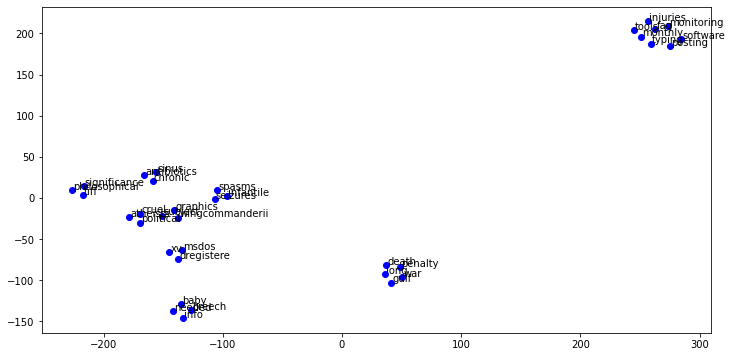

In [64]:
words = w2v_model.wv.index2word
wvs = w2v_model.wv[words]

tsne = TSNE(n_components=2, random_state=42, n_iter=5000, perplexity=5)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(12, 6))
plt.scatter(T[:, 0], T[:, 1], c='blue')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points')

# Transformers

In [20]:
!pip install transformers

     |████████████████████████████████| 1.1MB 2.8MB/s 
     |████████████████████████████████| 1.1MB 18.8MB/s 
     |████████████████████████████████| 890kB 21.5MB/s 
     |████████████████████████████████| 3.0MB 25.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893257 sha256=9623d983664e932bf66db1e3dc2a8eaeb11613d0ec12f098c57398e2a1122a20
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [21]:
from transformers import pipeline

In [22]:
classifier = pipeline('sentiment-analysis')

In [24]:
classifier.tokenizer('The hugging-face transformer package really simplifies NLP tasks')

{'input_ids': [101, 1996, 17662, 1011, 2227, 10938, 2121, 7427, 2428, 21934, 24759, 14144, 17953, 2361, 8518, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [23]:
classifier('The hugging-face transformer package really simplifies NLP tasks')

[{'label': 'POSITIVE', 'score': 0.9885591864585876}]